# Introduction

# Loading Libraries

In [1]:
#importing Libraries
import numpy as np 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the .csv file and inspecting contents

In [2]:
#Reading .csv file
df = pd.read_csv('eurocup_2020_results.csv') #Reading .csv file

#Looking at the first 5 rows
df.head()

,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,duels_won_home,duels_won_away,events_list,lineup_home,lineup_away
0,Final,11.07.2021,True,3,2,Italy,England,1,1,66%,34%,19,6,6,2,53%,47%,"[{'event_team': 'away', 'event_time': "" 2' "", ...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Kane', 'Player_Number': '9'}..."
1,Semi-finals,07.07.2021,False,False,False,England,Denmark,2,1,59%,41%,20,6,10,3,50%,50%,"[{'event_team': 'away', 'event_time': "" 30' "",...","[{'Player_Name': 'Kane', 'Player_Number': '9'}...","[{'Player_Name': 'Krogh Damsgaard', 'Player_Nu..."
2,Semi-finals,06.07.2021,True,4,2,Italy,Spain,1,1,29%,71%,7,16,4,5,49%,51%,"[{'event_team': 'away', 'event_time': "" 51' "",...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Torres', 'Player_Number': '1..."
3,Quarter-finals,03.07.2021,False,False,False,Ukraine,England,0,4,48%,52%,7,10,2,6,42%,59%,"[{'event_team': 'away', 'event_time': "" 4' "", ...","[{'Player_Name': 'Yaremchuk', 'Player_Number':...","[{'Player_Name': 'Kane', 'Player_Number': '9'}..."
4,Quarter-finals,03.07.2021,False,False,False,Czech Republic,Denmark,1,2,56%,44%,16,11,5,7,48%,52%,"[{'event_team': 'away', 'event_time': "" 5' "", ...","[{'Player_Name': 'Schick', 'Player_Number': '1...","[{'Player_Name': 'Dolberg', 'Player_Number': '..."


In [3]:
#looking at the size of the csv table (rows,calumn)
df.shape

(51, 20)

In [4]:
#Looking at the column names and data types
df.dtypes

stage                   object
date                    object
pens                      bool
pens_home_score         object
pens_away_score         object
team_name_home          object
team_name_away          object
team_home_score          int64
team_away_score          int64
possession_home         object
possession_away         object
total_shots_home         int64
total_shots_away         int64
shots_on_target_home     int64
shots_on_target_away     int64
duels_won_home          object
duels_won_away          object
events_list             object
lineup_home             object
lineup_away             object
dtype: object

# Statistical Analysis

In [5]:
#Statistical overview: Count, Mean, Min, MAx, Standard Deviation and Quartiles
df.describe()

,team_home_score,team_away_score,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,1.196078,1.588235,12.137255,12.235294,3.803922,4.352941
std,1.077397,1.344269,6.190378,5.788223,2.545738,2.681966
min,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,7.000000,8.500000,2.000000,2.000000
50%,1.000000,1.000000,11.000000,11.000000,4.000000,4.000000
75%,2.000000,2.000000,17.000000,16.000000,6.000000,6.500000
max,3.000000,5.000000,27.000000,28.000000,10.000000,10.000000


In [6]:
#Mean
df['team_home_score'].mean(axis=0)

1.196078431372549

In [7]:
#Median
df['team_home_score'].median(axis=0)

1.0

In [8]:
#Standard Deviation
df['team_home_score'].std(axis=0)

1.0773970084075275

In [9]:
#Variance
df['team_home_score'].var(axis=0)

1.16078431372549

In [10]:
#Spearman Correlation
stats.spearmanr(df['possession_home'], df['team_home_score'])

SpearmanrResult(correlation=0.13174170714134786, pvalue=0.3567763980277474)

In [11]:
#Kolmogorov-Smirnov statistic on 2 samples
stats.ks_2samp(df['total_shots_home'], df['team_home_score'])

KstestResult(statistic=0.9607843137254902, pvalue=2.5780209508709103e-26)

# EUR2020 Data Analysis

In [12]:
# Looking for unique rows under column stage
stage = df.drop_duplicates(subset = ["stage"])

#print(df['stage'].value_counts())
print(f"Tournament structure and games played:\n\n{df['stage'].value_counts()}")

total_matches = len(df['stage'])
print(f"\nA total of {total_matches} matches were played in Euro2020")
#print(f"Road to  the finals:\n {stage.stage.to_string(index=False)}")

Tournament structure and games played:

 Group stage: Matchday 3     12
 Group stage: Matchday 2     12
 Group stage: Matchday 1     12
 Round of 16                  8
 Quarter-finals               4
 Semi-finals                  2
 Final                        1
Name: stage, dtype: int64

A total of 51 matches were played in Euro2020


In [13]:
#Finding the start and the end date of the tournamnent
df.date = df.date.str.strip()
df.date = pd.to_datetime(df.date, format='%d.%m.%Y')
print (f"Tournament Start Date: {df.date.min().date()}")
print (f"Tournament End Date  : {df.date.max().date()}")

#Finading the duration of the tournament
delta = df.date.max() - df.date.min()
print(f"\nTournament Duration  : {delta.days} days")

Tournament Start Date: 2021-06-11
Tournament End Date  : 2021-07-11

Tournament Duration  : 30 days


In [14]:
# Looking for unique rows under column stage
teams = df.drop_duplicates(subset = ["team_name_home"])
print(f"Participating Teams:\n{teams.team_name_home.to_string(index=False)}")

Participating Teams:
           Italy 
         England 
         Ukraine 
  Czech Republic 
         Belgium 
     Switzerland 
          Sweden 
          France 
         Croatia 
     Netherlands 
           Wales 
        Portugal 
         Germany 
        Slovakia 
         Finland 
          Russia 
 North Macedonia 
           Spain 
         Hungary 
         Denmark 
          Turkey 
          Poland 
        Scotland 
         Austria 


In [15]:
#Total goals scored in the tournament
total_goals = df['team_home_score'].sum() + df['team_away_score'].sum()
print(f"Total goals scored in the tournament: {total_goals}\n")

#Avergae goals scored per game
average_goals = round(total_goals/total_matches, 2)
print(f"Average goal per game: {average_goals}\n")

#Minutes per goal
minutes_per_goal = round(total_matches*90/total_goals)
print(f"Minutes per goal: {minutes_per_goal}'")

Total goals scored in the tournament: 142

Average goal per game: 2.78

Minutes per goal: 32'


In [16]:
#Changing datatype from object to well formatted string
df.team_name_home = df.team_name_home.str.strip()

#Changing datatype from object to int64 for computation
df.possession_home = df.possession_home.str.rstrip('%').astype('int64')
df.duels_won_home = df.duels_won_home.str.strip('%').astype('int64')

In [17]:
hometeam_wins = df[df['team_home_score'] > df['team_away_score']]

Euro2020: Teams winning at Home vs Ball Possession

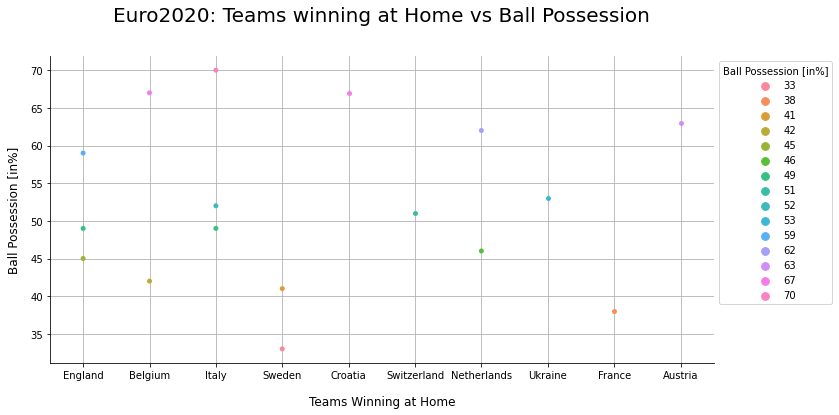

In [18]:
#Using seaborn categorical plot
sns.catplot(x="team_name_home", y="possession_home", data=hometeam_wins, hue='possession_home',
            jitter=False, legend=False, height=5, aspect=2)

plt.title('Euro2020: Teams winning at Home vs Ball Possession', fontsize=20, pad=35)

plt.xlabel('Teams Winning at Home', fontsize=12, labelpad=15)
plt.xticks(fontsize=10)

plt.ylabel('Ball Possession [in%]', fontsize=12, labelpad=10)
plt.yticks(fontsize=10)

plt.legend(title='Ball Possession [in%]', bbox_to_anchor=(1, 1))

plt.grid()#showing gridlines

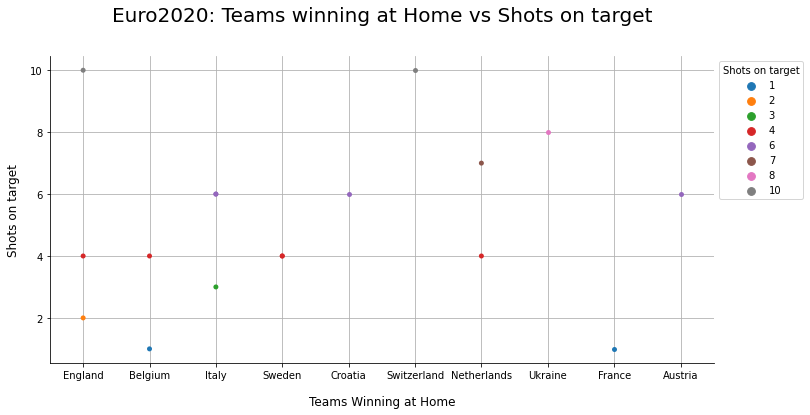

In [19]:
#Using seaborn categorical plot
sns.catplot(x="team_name_home", y="shots_on_target_home", data=hometeam_wins, hue='shots_on_target_home',
            jitter=False, legend=False, height=5, aspect=2)

plt.title('Euro2020: Teams winning at Home vs Shots on target', fontsize=20, pad=35)

plt.xlabel('Teams Winning at Home', fontsize=12, labelpad=15)
plt.xticks(fontsize=10)

plt.ylabel('Shots on target', fontsize=12, labelpad=10)
plt.yticks(fontsize=10)

plt.legend(title='Shots on target', bbox_to_anchor=(1, 1))

plt.grid() #showing gridlines

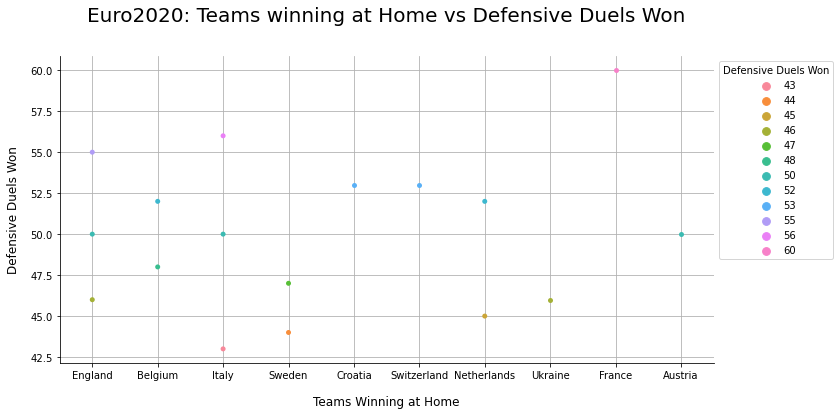

In [20]:
#Using seaborn categorical plot
sns.catplot(x="team_name_home", y="duels_won_home", data=hometeam_wins, hue='duels_won_home',
            jitter=False, legend=False, height=5, aspect=2)

plt.title('Euro2020: Teams winning at Home vs Defensive Duels Won', fontsize=20, pad=35)

plt.xlabel('Teams Winning at Home', fontsize=12, labelpad=15)
plt.xticks(fontsize=10)

plt.ylabel('Defensive Duels Won', fontsize=12, labelpad=10)
plt.yticks(fontsize=10)

plt.legend(title='Defensive Duels Won', bbox_to_anchor=(1, 1))

plt.grid()#showing gridlines